# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_25324/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

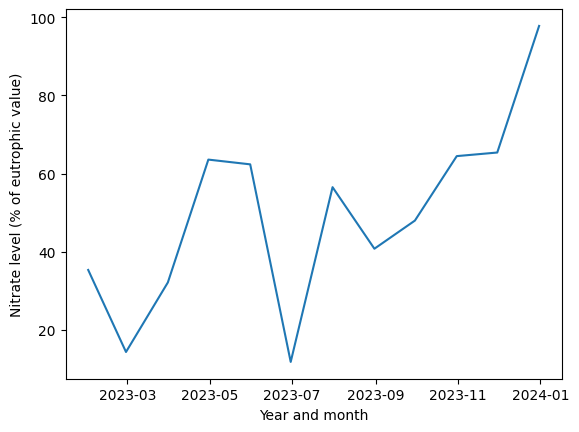

In [11]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_25324/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

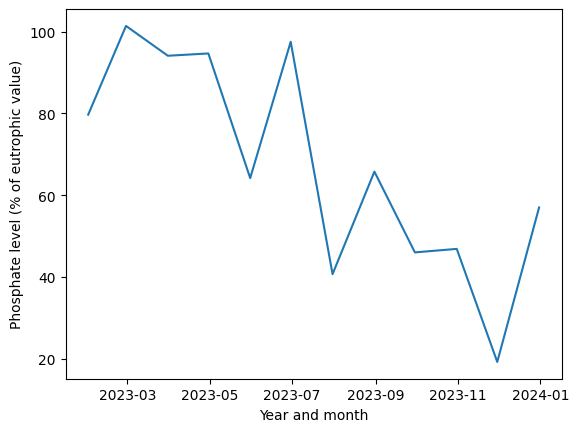

In [12]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

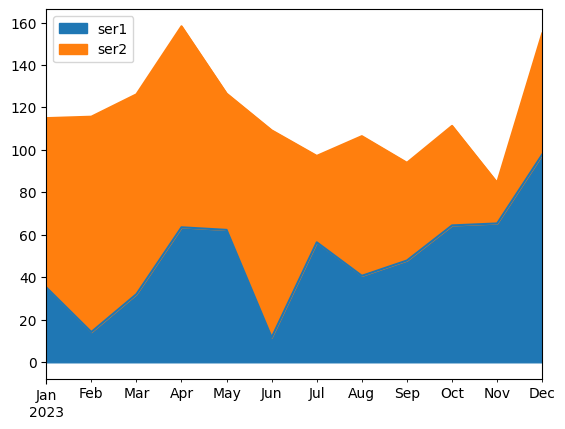

In [20]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/Marara29/Boston-University-Activities/refs/heads/main/enhanced_box_office_data(2000-2024)u.csv?token=GHSAT0AAAAAAC57Y4SXS56KA3IYDLDJMCPE2C6JVJA")

In [8]:
df['Rating'] = df['Rating'].str.extract(r'([\d.]+)').astype(float)
df_clean = df.dropna(subset=['$Worldwide', '$Domestic', '$Foreign', 'Rating', 'Vote_Count'])
correlation_matrix = df_clean[['$Worldwide', '$Domestic', '$Foreign', 'Rating', 'Vote_Count']].corr()
correlation_matrix

,$Worldwide,$Domestic,$Foreign,Rating,Vote_Count
$Worldwide,1.000000,0.915150,0.972487,0.182992,0.723369
$Domestic,0.915150,1.000000,0.796062,0.173808,0.730900
$Foreign,0.972487,0.796062,1.000000,0.174289,0.663643
Rating,0.182992,0.173808,0.174289,1.000000,0.307447
Vote_Count,0.723369,0.730900,0.663643,0.307447,1.000000


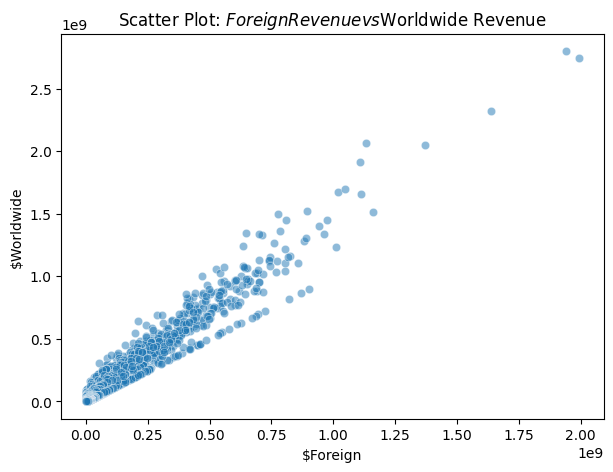

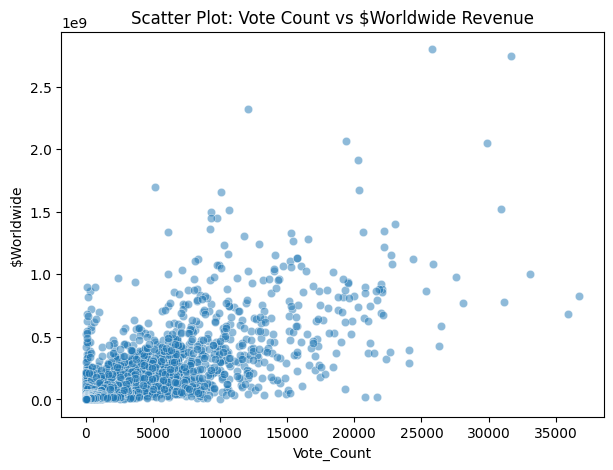

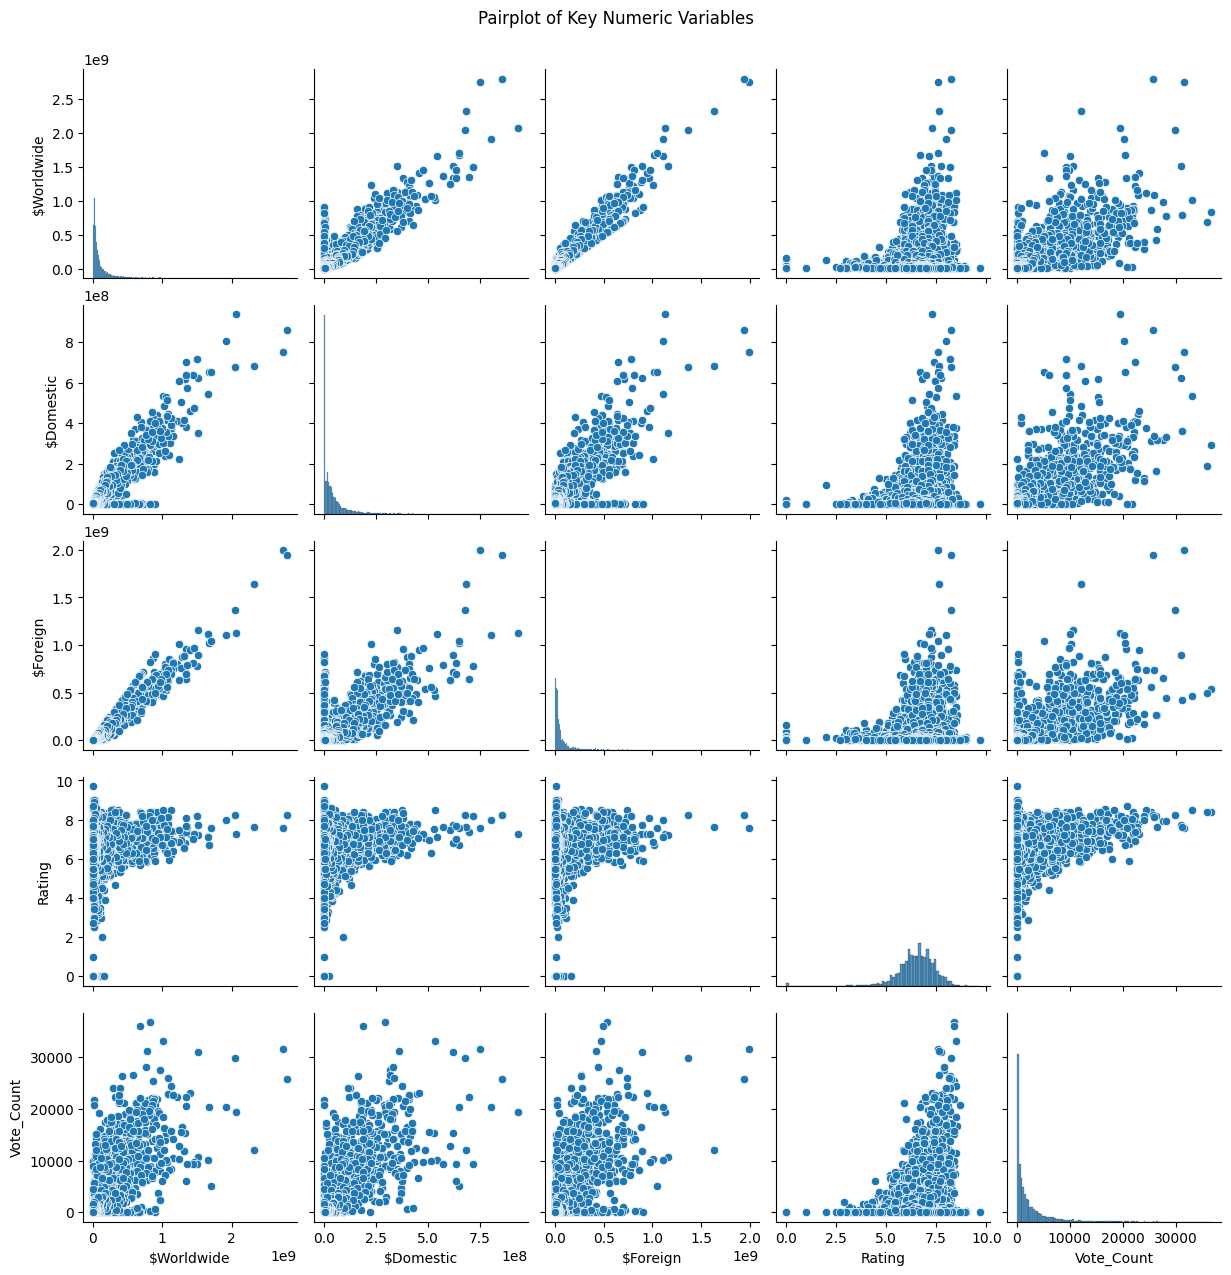

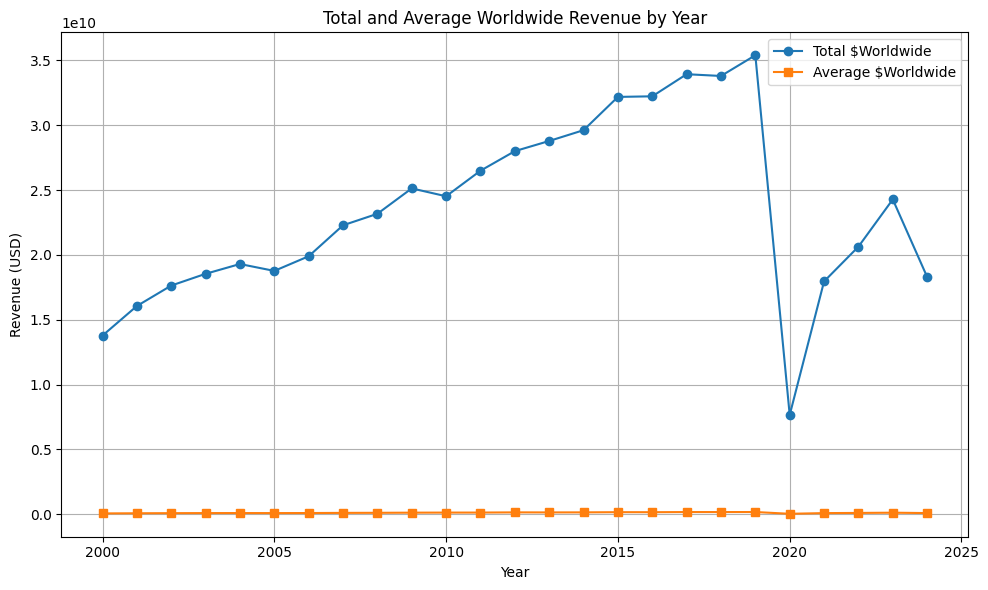

In [ ]:


# 1. Scatter plot: $Foreign vs $Worldwide
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_clean, x="$Foreign", y="$Worldwide", alpha=0.5)
plt.title("Scatter Plot: $Foreign Revenue vs $Worldwide Revenue")
plt.show()

# 2. Scatter plot: Vote_Count vs $Worldwide
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_clean, x="Vote_Count", y="$Worldwide", alpha=0.5)
plt.title("Scatter Plot: Vote Count vs $Worldwide Revenue")
plt.show()

# 3. Pairplot for numeric relationships
sns.pairplot(df_clean[['$Worldwide', '$Domestic', '$Foreign', 'Rating', 'Vote_Count']])
plt.suptitle("Pairplot of Key Numeric Variables", y=1.02)
plt.show()

#4. Total And Average Worldwide Revenue By Year
revenue_by_year = df_clean.groupby("Year")["$Worldwide"].agg(["sum", "mean"]).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_year["Year"], revenue_by_year["sum"], label="Total $Worldwide", marker='o')
plt.plot(revenue_by_year["Year"], revenue_by_year["mean"], label="Average $Worldwide", marker='s')
plt.title("Total and Average Worldwide Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

ANS:Yes,the data is mostly clean, well-structured, and aligns with expectations

- Do you see any outliers?  (Data points that are far from the rest of the data).

ANS:yes some movies have a way more revenue than others 

- Are any data items highly correlated with each other, suggesting that they are redundant?

ANS:yes some data items are higly correlated ,like worldwide is hihly correlated with domestic and foreign, and yeah we can consider them redudant

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

ANS:I noticed a contunued rise and small dip in revenues over the years , with major dip during covid years (2020) ,that shows that revenue was super low
- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

ANS:Yeah if the budget variable were present , it can add enough knwoledge to this data

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

##  Gestalt principle of similarity

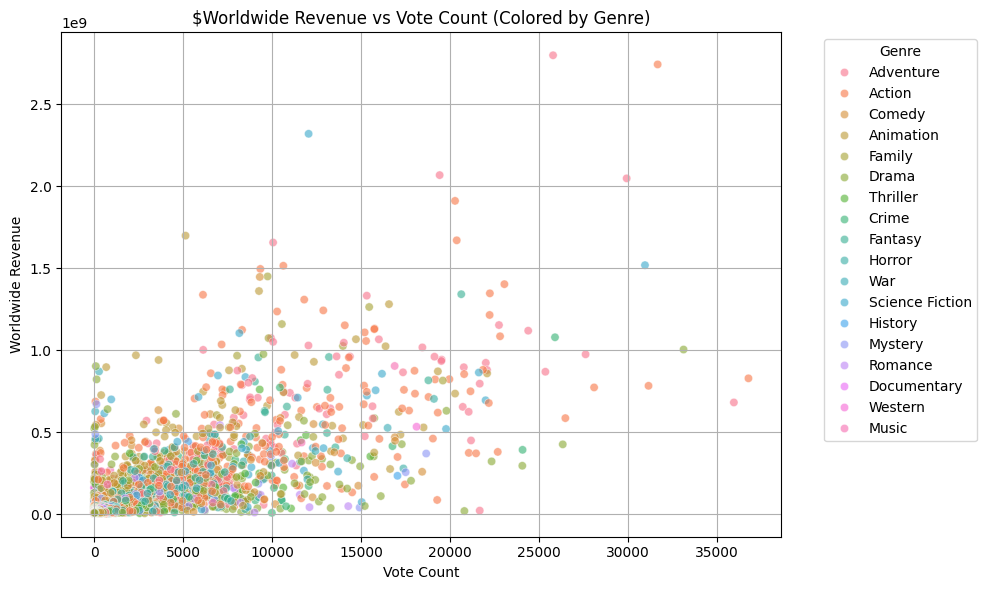

In [ ]:

df["Primary_Genre"] = df["Genres"].str.split(",").str[0].str.strip()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Vote_Count", y="$Worldwide", hue="Primary_Genre", alpha=0.6, legend='full')
plt.title("$Worldwide Revenue vs Vote Count (Colored by Genre)")
plt.xlabel("Vote Count")
plt.ylabel("Worldwide Revenue")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
